# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:https://ddt-vehss.cdc.gov/LP?Level1=Cataract&Level2=Cataract+Treatment&Level3=Cataract+Surgery&Level4=Cataract+Surgery&LocationId=&DataSourceId=Medicare+FFS+MA&GSDataSourceId=&GSLocationId=&RiskFactorSubCatId=&IndicatorId=QCATS~RCATSUR&ShowFootnotes=true&View=NationalTable&CompareViewYear=1&CompareId=RACE&CompareId2=&YearId=YR19&ResponseId=RCATSUR&AgeId=AGEALL&GenderId=GALL&RaceId=&RiskFactorId=RFCAT&RiskFactorResponseId=RFTOT&DataValueTypeId=CRDPREV&MapClassifierId=quantile&MapClassifierCount=7&CountyFlag=N

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")
import numpy as np

Mo_Cataract = pd.read_csv("Cataract Diagnosed Medicare 65 and older (Ethnicity).csv")
Mo_AMD = pd.read_csv("AMD Medicare (Ethnicity).csv")
Mo_Glaucoma = pd.read_csv("Glaucoma Medicare (Ethnicity).csv")
Mo_Cornea = pd.read_csv("Other Cornea Disease Medicare (Ethnicity).csv")
Mo_Retina = pd.read_csv("Other Retina Disease Medicare (Ethnicity).csv")
National_Cataract = pd.read_csv("National Catract Diagnosed by State (Ethnicity).csv")
National_AMD = pd.read_csv("AMD NAtional by State Medicare (Ethnicity).csv")
National_Glaucoma = pd.read_csv("Glaucoma National Medicare by State (Ethnicity).csv")
National_Cornea = pd.read_csv("National Corea Disease by State Medicare (Ethnicity).csv")
National_Retina = pd.read_csv("National Retina Disease by State Medicare (Ethnicity).csv")

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [ ]:
National_AMD.info()
#Gives me a good overview of my colums and how many values are present in each

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   378 non-null    int64  
 1   YearEnd                     378 non-null    int64  
 2   LocationAbbr                378 non-null    object 
 3   LocationDesc                378 non-null    object 
 4   CountyName                  0 non-null      float64
 5   DataSource                  378 non-null    object 
 6   Topic                       0 non-null      float64
 7   Category                    0 non-null      float64
 8   Question                    378 non-null    object 
 9   Response                    378 non-null    object 
 10  Age                         378 non-null    object 
 11  Sex                         378 non-null    object 
 12  Race_Ethnicity              378 non-null    object 
 13  Risk_Factor                 378 non

In [ ]:
National_AMD.describe()
#I just wanted to see what the describe function would do

,YearStart,YearEnd,CountyName,Topic,Category,Data_Value,Data_Value_Footnote_Symbol,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
count,378.0,378.0,0.0,0.0,0.0,365.000000,0.0,365.000000,365.000000,3.650000e+02
mean,2022.0,2022.0,NaN,NaN,NaN,7.901041,NaN,7.261342,8.644356,5.006926e+04
std,0.0,0.0,NaN,NaN,NaN,2.710920,NaN,2.775962,2.929545,3.184030e+05
min,2022.0,2022.0,NaN,NaN,NaN,1.680000,NaN,1.540000,1.830000,1.000000e+01
25%,2022.0,2022.0,NaN,NaN,NaN,5.960000,NaN,5.110000,6.690000,2.000000e+02
50%,2022.0,2022.0,NaN,NaN,NaN,8.070000,NaN,7.050000,8.860000,1.220000e+03
75%,2022.0,2022.0,NaN,NaN,NaN,9.870000,NaN,9.460000,10.570000,2.596000e+04
max,2022.0,2022.0,NaN,NaN,NaN,17.180000,NaN,13.830000,23.860000,4.569000e+06


In [ ]:
National_AMD.head(51)
#I want to see what the national data set would look like. Seems like there is a row for every different ethnicity in every state. I will have to pull only the national and missouri data into a new table to compare. 

,YearStart,YearEnd,LocationAbbr,LocationDesc,CountyName,DataSource,Topic,Category,Question,Response,...,Risk_Factor,Risk_Factor_Repsonse,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
0,2022,2022,HI,Hawaii,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,All patients,Total,%,Crude Prevalence,12.45,NaN,NaN,12.31,12.59,27300.0
1,2022,2022,ME,Maine,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,All patients,Total,%,Crude Prevalence,4.15,NaN,NaN,2.92,5.70,40.0
2,2022,2022,MD,Maryland,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,All patients,Total,%,Crude Prevalence,8.25,NaN,NaN,5.41,11.94,20.0
3,2022,2022,MA,Massachusetts,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,All patients,Total,%,Crude Prevalence,7.06,NaN,NaN,6.84,7.28,3750.0
4,2022,2022,OR,Oregon,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,All patients,Total,%,Crude Prevalence,8.39,NaN,NaN,7.67,9.15,470.0
5,2022,2022,DC,District Of Columbia,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,All patients,Total,%,Crude Prevalence,7.82,NaN,NaN,5.78,10.30,50.0
6,2022,2022,IN,Indiana,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,All patients,Total,%,Crude Prevalence,6.85,NaN,NaN,6.29,7.44,520.0
7,2022,2022,KS,Kansas,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,All patients,Total,%,Crude Prevalence,9.80,NaN,NaN,8.49,11.24,180.0
8,2022,2022,MA,Massachusetts,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,All patients,Total,%,Crude Prevalence,8.40,NaN,NaN,5.85,11.59,30.0
9,2022,2022,MI,Michigan,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,All patients,Total,%,Crude Prevalence,10.67,NaN,NaN,10.62,10.72,146300.0


In [6]:
Mo_AMD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   7 non-null      float64
 1   YearEnd                     7 non-null      float64
 2   LocationAbbr                7 non-null      object 
 3   LocationDesc                7 non-null      object 
 4   CountyName                  0 non-null      float64
 5   DataSource                  7 non-null      object 
 6   Topic                       0 non-null      float64
 7   Category                    0 non-null      float64
 8   Question                    7 non-null      object 
 9   Response                    7 non-null      object 
 10  Age                         7 non-null      object 
 11  Sex                         7 non-null      object 
 12  Race_Ethnicity              7 non-null      object 
 13  Risk_Factor                 7 non-nul

In [ ]:
Mo_AMD.head(10)
#Well I have learned that this table only contains 7 columns. Seems like the data contains the percentage of each ethnicity, the total sample size, and a confidence value which I am not sure how I will use it 

,YearStart,YearEnd,LocationAbbr,LocationDesc,CountyName,DataSource,Topic,Category,Question,Response,...,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Unnamed: 23,Unnamed: 24
0,2022.0,2022.0,MO,Missouri,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,%,Crude Prevalence,7.75,NaN,NaN,7.18,8.34,640.0,NaN,NaN
1,2022.0,2022.0,MO,Missouri,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,%,Crude Prevalence,8.48,NaN,NaN,7.54,9.49,270.0,NaN,NaN
2,2022.0,2022.0,MO,Missouri,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,%,Crude Prevalence,6.30,NaN,NaN,5.86,6.77,700.0,NaN,NaN
3,2022.0,2022.0,MO,Missouri,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,%,Crude Prevalence,8.98,NaN,NaN,7.33,10.87,100.0,NaN,NaN
4,2022.0,2022.0,MO,Missouri,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,%,Crude Prevalence,10.67,NaN,NaN,10.60,10.73,89840.0,NaN,NaN
5,2022.0,2022.0,MO,Missouri,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,%,Crude Prevalence,9.99,NaN,NaN,9.93,10.05,93690.0,NaN,NaN
6,2022.0,2022.0,MO,Missouri,NaN,Medicare FFS MA,NaN,NaN,Annual prevalence of diagnosed age related mac...,All Age-related macular degeneration (AMD),...,%,Crude Prevalence,2.97,NaN,NaN,2.84,3.09,2130.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(Mo_AMD.columns)
# When I do this I can see all the Column names however when I use the head function the column Race_Ethnicity does not show up. Maybe this is something I have to fix in my Cleaning and editing the data

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'CountyName',
       'DataSource', 'Topic', 'Category', 'Question', 'Response', 'Age', 'Sex',
       'Race_Ethnicity', 'Risk_Factor', 'Risk_Factor_Repsonse',
       'Data_Value_Unit', 'Data_Value_Type', 'Data_Value',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<Axes: xlabel='Race_Ethnicity'>

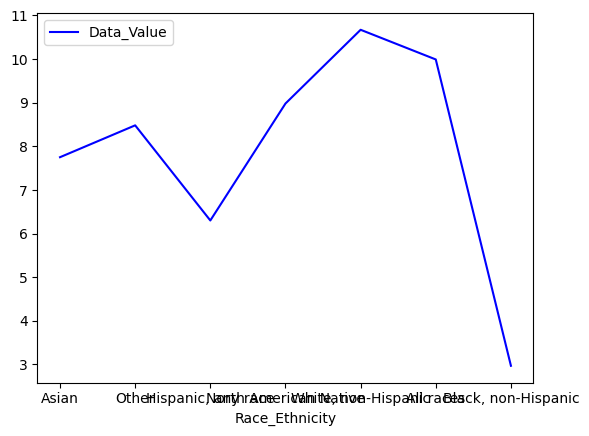

In [ ]:
Mo_AMD.plot(x="Race_Ethnicity" , y="Data_Value" , color="blue")
#Seems like the x value names are too long. Might have to change that in the future. Don't think this is a good representation of the data


TypeError: 'value' must be an instance of str or bytes, not a float

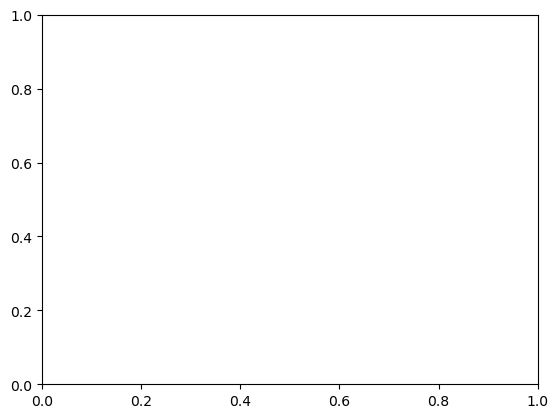

In [ ]:
Mo_AMD.plot.scatter(x="Race_Ethnicity", y="Data_Value", color="orange", s=100)
#Well this did not work. I don't think my data is well suited to scatter plots or plot boxes. Most likely will have to visualize on Tableau with pie charts and bar graphs/ I expect this for all of the data sets. 

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? The amount of empty spaces of null values. Also there is data I don't need so I will have to clear and trim the data sets into new smaller data sets. 
2. Do you have any concerns about your dataset? My concern is that the data will not fully support every question I have as well as some of the data sets I have are from different years so that makes a comparison harder using data between different years. 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? I want to manipulate and edit the data sets and get rid of teh filler data I don't need. 